#### Author: Rudransh Jaiswal
# Decision Tree Classifier from Scratch 

- A simple implementation of Decision tree using tuples for binary classification tasks.
- Prior knowledge of decision tree training is required. Apart from that the code is self-explanatory 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

### The Algorithm


In [2]:
def accuracy(Y_true,Y_pred):
    l = len(Y_true)
    count=np.sum(Y_true==Y_pred)
    return count/l

# reports accuracy for each split x[ind]>=val or threshold :)
def split_accuracy(X_train,Y_train,val,ind):
    Y_pred = []
    for x in X_train:
        if x[ind]>=val:
            Y_pred.append(1)
        else:
            Y_pred.append(-1)
    l = len(Y_pred)
    ct = 0
    for i in range(l):
        if(Y_pred[i] == Y_train[i]):
            ct = ct + 1
    return ct/l

def H(p):
    if p==0 or p==1:
        return 0
    else:
        return -(p*np.log2(p) + (1-p)*np.log2(1-p))
    
def split_entropy(X_train,Y_train,val,ind):
    l=len(X_train)
    pr=0
    qr=0
    ql=0
    for i in range(l):
        x=X_train[i]
        if x[ind]>=val: #goes to right
            pr=pr+1              #no of points on right
            if Y_train[i]==1:
                qr=qr+1          #no of positive points on right
        else:
            if Y_train[i]==1:
                ql=ql+1
    pl=l-pr
    if pr!=0:
        qr=qr/pr
    if pl!=0:
        ql=ql/pl
    pl=pl/l
    pr=pr/l
    return pl*H(ql)+pr*H(qr)
#     entropy is defined as plHl+prHr, Hp=-plogp-(1-p)log(1-p)

#tells whether it can be splitted
def is_split(X_train, threshold):
    l=len(X_train)
    ind=threshold[0]
    val=threshold[1]
    n=0
    for x in X_train:
        if x[ind]>=val:
            n=n+1
    if n==0 or n==l:
        return False
    return True

# here I split the tree
def bestSplit(X_train,Y_train,criteria,features):
#     features=len(X_train[0])
# features is amatrix contaning indices of features
    x_min = np.min(X_train,axis=0)
    x_max = np.max(X_train,axis=0)
    thresholds=[]
#     here i put split values for each feature
    for f in features:
        thresholds.append(np.linspace(x_min[f],x_max[f],15)[1:-1])    
    best_threshold = () # store(i,a,1 or -1) -> x[i]>=a is classified as 1 or -1
    best_accuracy = 0
    least_entropy=1
#   i represent the index of the feature of X
    if(criteria=='accuracy'):
        j=-1
        for i in features:
            j=j+1
            for a in thresholds[j]:
                curr_threshold = (i,a,1)
                curr_acc = split_accuracy(X_train,Y_train,a,i)
                if(curr_acc < 0.5):
                    curr_threshold = (i,a,-1)
                    curr_acc = 1 - curr_acc
                if(curr_acc >= best_accuracy):
                    if (is_split(X_train,curr_threshold)):
                        best_accuracy = curr_acc
                        best_threshold = curr_threshold
    elif(criteria=='entropy'):
        j=-1
        for i in features:
            j=j+1
            for a in thresholds[j]:
                curr_threshold = (i,a,1)
                curr_entropy=split_entropy(X_train,Y_train,a,i)
                if(curr_entropy>0.5):
                    curr_threshold=(i,a,-1)
                    curr_entropy=1-curr_entropy
                if(curr_entropy <= least_entropy):
                    if (is_split(X_train,curr_threshold)):
                        least_entropy = curr_entropy
                        best_threshold = curr_threshold
    X_right,Y_right,X_left, Y_left = [[],[],[],[]]
    l = len(X_train)
    ind = best_threshold[0]
    val = best_threshold[1]
    for i in range(l):
        if(X_train[i][ind] >= val):
            X_right.append(X_train[i])
            Y_right.append(Y_train[i])
        else:
            X_left.append(X_train[i])
            Y_left.append(Y_train[i])
    return np.array(X_left),np.array(X_right),np.array(Y_left), np.array(Y_right),ind,val

# for prediction at last 
def predict_class(Y_train):
    pos=np.count_nonzero(Y_train == 1)
    ratio = pos/len(Y_train)
    if (ratio >= 0.5):
        return 1
    else :
        return -1

# check if remaining of the dset is pure
def isPure(Y_train):
    a=Y_train[0]
    for i in range(1,len(Y_train)):
        if Y_train[i]!=a:
            return False
    return True

# this will build tree recursively     
def buildDecisionTree(X_train,Y_train,minNodeSize,criteria,features):
# "features" : this part is just added to extend this code to random forest Classifier
#node is a tuple(index, threshValue, nodeLeftBranch, nodeRightBranch, classPred(+-1 only for leaf node))
    global pos
    curr_pos = pos
    pos = pos+1
    if(len(X_train)<=minNodeSize):
        c = predict_class(Y_train)
        node_tuples.append((-1,-1,-1,-1,c))
    elif (isPure(Y_train)):
        c = Y_train[0]
        node_tuples.append((-1,-1,-1,-1,c))
    else:
        X_left,X_right,Y_left,Y_right,ind,a = bestSplit(X_train, Y_train, criteria,features)
        node_tuples.append((ind,a,-1,-1,0))
        leftBranch = buildDecisionTree(X_left,Y_left,minNodeSize,criteria,features)
        rightBranch = buildDecisionTree(X_right,Y_right,minNodeSize,criteria,features)
        node_tuples[curr_pos] = (ind,a,leftBranch,rightBranch,0)
    return curr_pos

# master function to build tree, return trees
def TreeBuild(X_train,Y_train,size,criteria,features):    
    global node_tuples
    global pos
    node_tuples = []
    pos = 0
    buildDecisionTree(X_train,Y_train,size,criteria,features)
    return node_tuples

# recall node tuple is like(ind,a,leftB,rightB,dec)
def predict_tree(X,tree):
    Y_pred=[]
    for x in X:
        node = tree[0] #root node
        while (node[2]!= -1):
            if(x[node[0]] >= node[1]): #direct to rightBranch
                node = tree[node[3]]
            else:                      #direct to leftBranch
                node = tree[node[2]]
        Y_pred.append(node[4])                 #return decision
    return Y_pred

### Lets make prediction on breast cancer dataset:

In [3]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
features=np.arange(len(X_train[0])) # this part is just added to extend this code to random forest Classifier
tree1=TreeBuild(X_train,y_train,5,'entropy',features)
tree2=TreeBuild(X_train,y_train,7,'accuracy',features)
y_test_pred1=predict_tree(X_test,tree1)
y_test_pred2=predict_tree(X_test,tree2)
print('prediction on breast cancer dataset using Decision Trees')
print('criteria = entropy, minNodeSize = 5 , accuracy: ',accuracy(y_test_pred1,y_test))
print('criteria = accuracy, minNodeSize = 7 , accuracy: ',accuracy(y_test_pred2,y_test))

prediction on breast cancer dataset using Decision Trees
criteria = entropy, minNodeSize = 5 , accuracy:  0.8128654970760234
criteria = accuracy, minNodeSize = 7 , accuracy:  0.7251461988304093


### Lets take another 2D dataset to visualise the plots:

In [4]:
def class_sep(X,Y):
    pos,neg=[],[]
    for i in range(len(X)):
        if(Y[i]==1): pos.append(X[i])
        else: neg.append(X[i])
    return np.array(pos), np.array(neg)

def meshgen(X):
    xmax,xmin=np.max(X,axis=0),np.min(X,axis=0)
    x1,x2=np.linspace(xmin[0],xmax[0],100),np.linspace(xmin[1],xmax[1],100)
    xv,yv=np.meshgrid(x1,x2)
    x1,x2=xv.reshape(10000,1),yv.reshape(10000,1)
    Xmesh=np.stack((x1, x2), axis=-1)
    Xmesh=Xmesh.reshape(10000,2)
    return np.array(Xmesh)

def plotIt(ttl, ax, X_mesh, Y_mesh_pred, X_test, Y_test):
    Xt_pos,Xt_neg=class_sep(X_test,Y_test)
    Xm_pos,Xm_neg=class_sep(X_mesh,Y_mesh_pred)
    Xt_pos,Xt_neg=np.transpose(Xt_pos),np.transpose(Xt_neg)
    Xm_pos,Xm_neg=np.transpose(Xm_pos),np.transpose(Xm_neg)
    ax.scatter(Xm_pos[0], Xm_pos[1], color='aquamarine', label='+1')
    ax.scatter(Xm_neg[0], Xm_neg[1], color='lavender', label='-1')
    ax.scatter(Xt_pos[0], Xt_pos[1], marker='.', c='green')
    ax.scatter(Xt_neg[0], Xt_neg[1], marker='.', c='darkviolet')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(ttl)
    ax.legend(loc=1)

In [5]:
dataset=np.load('./dset1.npz')
X_train=np.array(dataset[dataset.files[0]])
Y_train=np.array(dataset[dataset.files[1]])
X_test=np.array(dataset[dataset.files[2]])
Y_test=np.array(dataset[dataset.files[3]])

X_mesh=meshgen(X_test)
features=np.arange(len(X_train[0]))

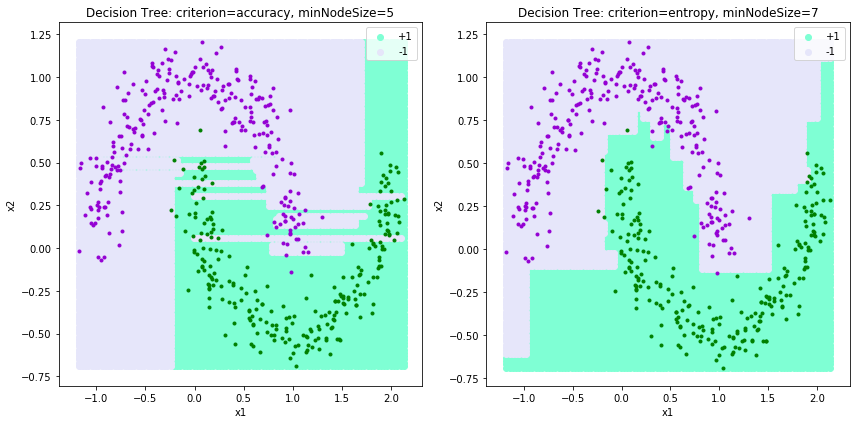

In [6]:
#plot the results:
fig, axes= plt.subplots(figsize=(12,6), nrows=1, ncols=2)

ax=axes[0]
tree3=TreeBuild(X_train,Y_train, 5,'accuracy',features)
Y_mesh_pred1=predict_tree(X_mesh,tree3)
ttl="Decision Tree: criterion=accuracy, minNodeSize=5"
plotIt(ttl,ax, X_mesh, Y_mesh_pred1, X_test, Y_test)

ax=axes[1]
tree4=TreeBuild(X_train,Y_train, 7,'entropy',features)
Y_mesh_pred2=predict_tree(X_mesh,tree4)
ttl="Decision Tree: criterion=entropy, minNodeSize=7"
plotIt(ttl,ax, X_mesh, Y_mesh_pred2, X_test, Y_test)

plt.tight_layout()   